In [17]:
%matplotlib notebook
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

filename = 'wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename, header=31, 
                 na_values=-999, parse_dates=[[8,9]])

In [33]:
x = df['NITRAT']
y = df['PHSPHT']
ii = np.isfinite(x) & np.isfinite(y) & (df['CTDPRS']>500)

<IPython.core.display.Javascript object>


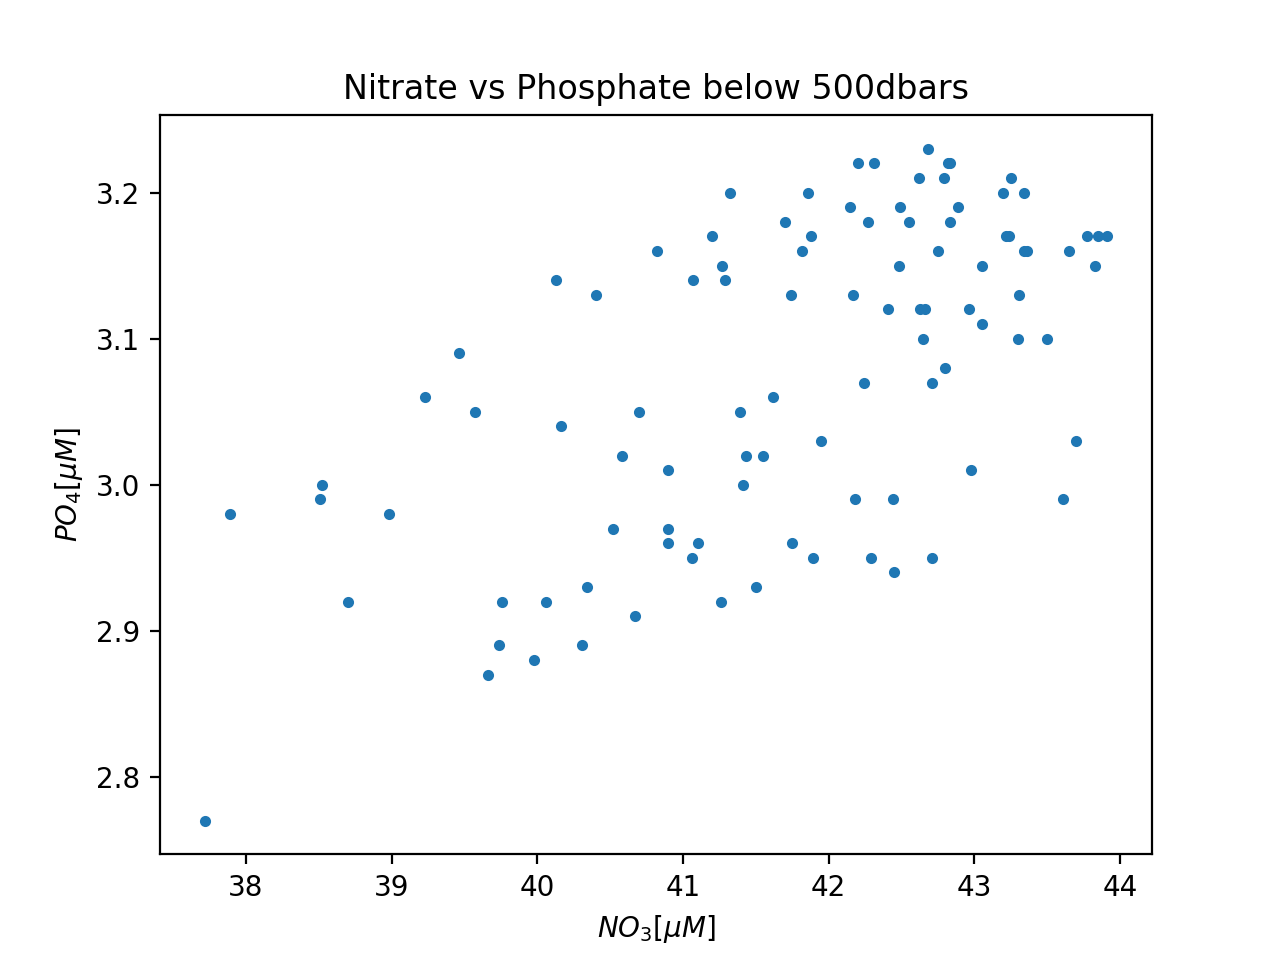

Text(0,0.5,'$PO_4 [\\mu M]$')

In [86]:
plt.figure()
plt.plot(df['NITRAT'][ii],df['PHSPHT'][ii],'.')

plt.title('Nitrate vs Phosphate below 500dbars')
plt.xlabel('$NO_3 [\mu M]$')
plt.ylabel('$PO_4 [\mu M]$')

In [28]:
# regression analysis

slopeI,interceptI,rvalue,pvalue,stderr = stats.linregress(x[ii],y[ii])

In [37]:
import regress

In [38]:
slopeII,interceptII=regress.type2regress(x[ii],y[ii])

<IPython.core.display.Javascript object>


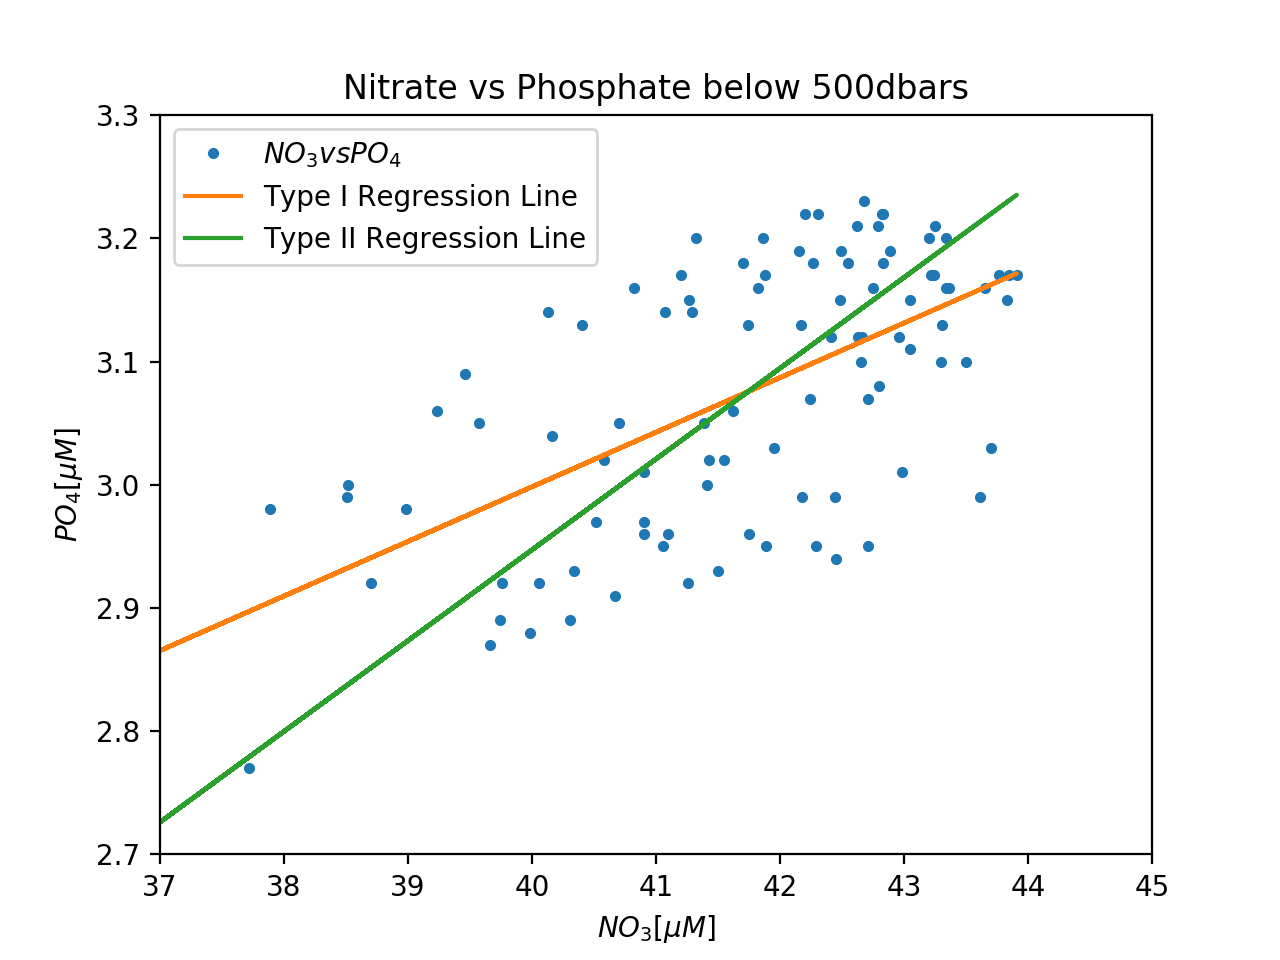

In [40]:
plt.figure()
plt.plot(df['NITRAT'][ii],df['PHSPHT'][ii],'.',label='$NO_3 vs PO_4$')
plt.plot(x,slopeI*x+interceptI,'-',label='Type I Regression Line')
plt.plot(x,slopeII*x+interceptII,'-',label='Type II Regression Line')

plt.title('Nitrate vs Phosphate below 500dbars')
plt.xlabel('$NO_3 [\mu M]$')
plt.ylabel('$PO_4 [\mu M]$')
plt.xlim(37,45)
plt.ylim(2.7,3.3)
plt.legend()

In [77]:
#covariance
s2xy=(1/(N-1))*(sum((x[ii]-np.mean(x[ii]))*(y[ii]-np.mean(y[ii]))))

denom=np.std(x[ii],ddof=1)*np.std(x[ii],ddof=1)

In [78]:
#correlation coefficient
rxy=s2xy/denom

In [79]:
rxy

0.044318374817489264

In [56]:
N=len(x[ii])
rvalue=(regress.rcrit(len(x[ii])-2,alpha=0.05))**2
#test statistic
tstat=abs(rvalue)*((N-2)**0.5)/(1-rvalue**2)**0.5

In [57]:
#critical t-value
stats.t.ppf(0.95,N-2)

1.6608814403008005

In [58]:
tstat

0.38658723217248331

The correlation coefficient is close to zero, suggesting weak linear coefficient.  Additionally, since the test statistic is less than the critical t-value, we can conclude there is no significant linear relationship between phosphate and nitrate below 500m.

Since neither nitrate nor phosphate measurements are exactly known, a Type II regression model may be a better choice in this case.

Plotting the data against the Redfield Ratio - N:P = 16:1 (shown below) - shows in this water mass, phosphorus is enriched.  This suggests that nitrogen is the limiting nutrient in these deeper waters.

<IPython.core.display.Javascript object>


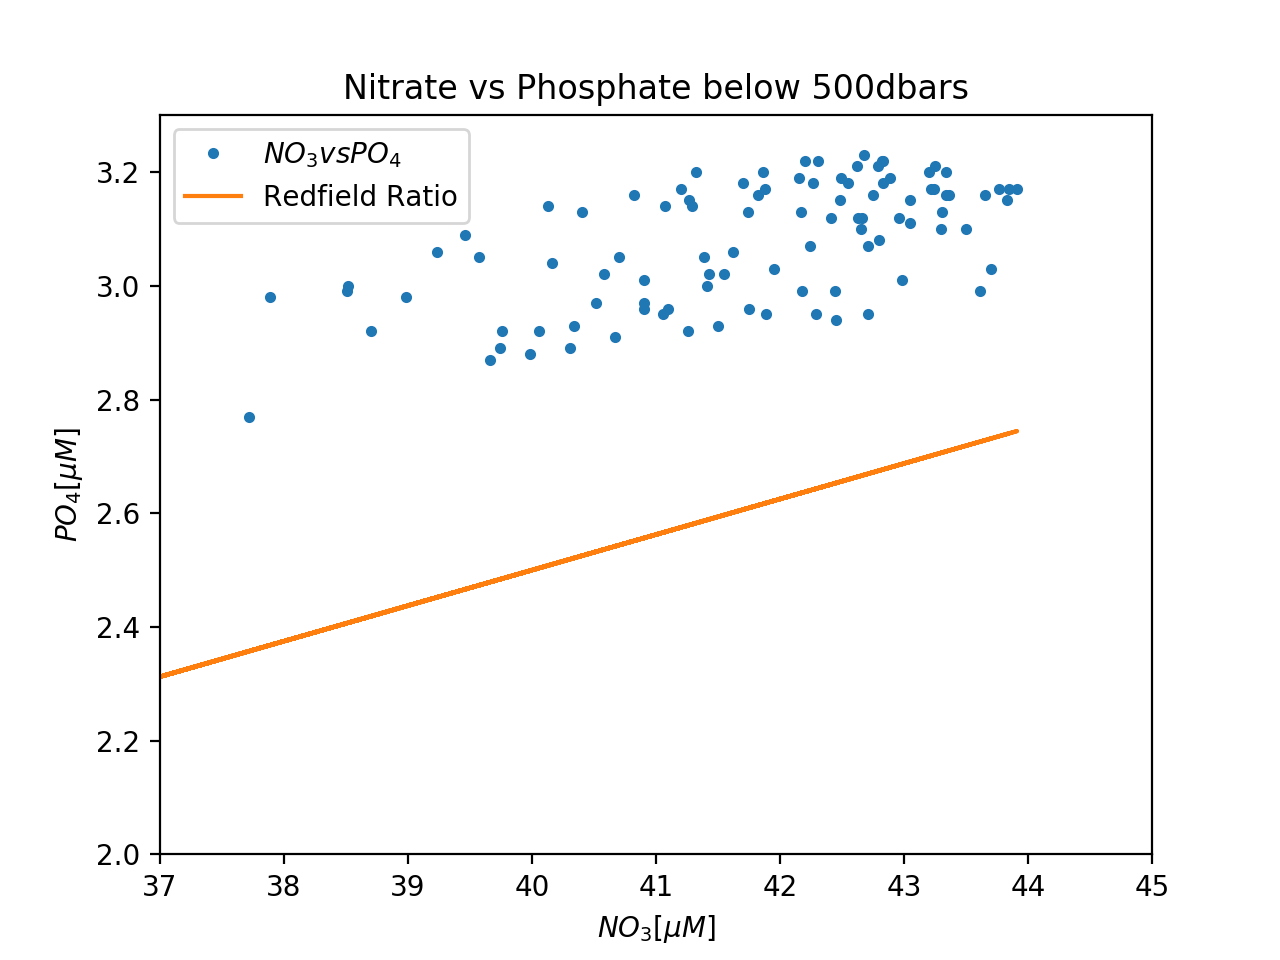

In [84]:
plt.figure()
plt.plot(df['NITRAT'][ii],df['PHSPHT'][ii],'.',label='$NO_3 vs PO_4$')
plt.plot(x,(1/16)*x,'-',label='Redfield Ratio')

plt.title('Nitrate vs Phosphate below 500dbars')
plt.xlabel('$NO_3 [\mu M]$')
plt.ylabel('$PO_4 [\mu M]$')
plt.xlim(37,45)
plt.ylim(2,3.3)
plt.legend()